# Exercise: Lower bounds on the regret 

Consider the problem of [A/B testing](https://en.wikipedia.org/wiki/A/B_testing) in it's simplest case where you are interested in understanding whether the effect of an intervention in the context of, e.g. medical, advertisement, web page design, etc. was postive or negative. Though instead of randomly splitting your target audience and collecting data in an offline manner, you'd be interested in adaptively reject or accept the intervention. This problem can be modeled as a multi armed bandit (MAB) with 2 arms stated in the following:

- Suppose reward distribution $R_t \mid A_t = 1 \sim \mathcal{N}(0,1)$ and arm 2 follows $R_t \mid A_t = 2 \sim \mathcal{N}(\zeta \Delta,1)$ where $\zeta \in \{-1,1\}$ models the positivity or negativity of the effect and $\Delta$ is the effect size. 


- Let $\mu_1 = \mathbb{E}[R_t | A_t=1]=0$, $\mu_2 = \mathbb{E}[R_t | A_t=2]=\zeta \Delta$ and $\mu^* = \max_{i=1,2} \mu_i$. 

- Assume $\Delta$ is known to the experimenter beforehand though $\zeta$ is **unknown** and the goal is to determine it with minimal regret,
$$ L_{T}(\zeta) = T \mu^* - \sum_{t=1}^{T} \mathbb{E}[ R_{t} ]. $$ 

- Note that $\mu^*$ is an (invertible) function of $\zeta$,
$$ 
\mu^* = \mu^*(\zeta) =
\begin{cases}
    \Delta & \zeta = 1 \\
    0 & \zeta = -1, \\
\end{cases}
$$
and therefore if we can identify $\mu^*$ then we can determine $\zeta$.

- Let $\pi_t(i)$ fpr $i=1,2$ be an arbitrary policy at time $t$, and let $N_{i}(t) = \sum_{j=1}^{t-1} 1\{ A_{j} = i \}$ be the number of times up to time $t$ that arm $i$ was pulled and $\bar{N}_{i}(t) = \mathbb{E}_{\pi_t}[N_{i}(t)]$ to be it's expectation with respect to actions taken by policy $\pi_t$. 

**Goal:** We want to show that **any** action policy $\pi$ suffers bad regret bounds either in positive or negative effect sizes (see [Bubeck et al.](https://arxiv.org/pdf/1302.1611.pdf) for more lower bounds). More precisely, we show lower bounds of the following form for any policy $\pi_t$:
$$ \max \left({L_{T}(\zeta = +1), L_{T}(\zeta = -1)}\right) \geq \frac{1}{2}\left( L_T(\zeta = +1) + L_{T}(\zeta = -1) \right) \geq \frac{\log(T\Delta^2 / 4)}{2\Delta} $$
This means that with a uniform prior on $\zeta$ any action policy $\pi_t$ would suffer a loss $\bar{L}_T = ({L_{T}(\zeta = +1) + L_{T}(\zeta = -1)})/2$ that is logarithmic in time parameter $T$. It also says that the maximum regret is bounded below by a term that is logarithmic in $T$. This is indeed similar to the lower bound in Lai and Robbins since the KL divergence for gaussians is proportional to mean differences, that is the effect size $\Delta$. Proving lower bounds for the general $n$ armed bandits (such as the ones in Lai and Robbins) requires some restriction on action policy. 

## Exploration eploitation tradeoff

The essense of our lower bound is the exploration exlpoitation tradeoff. That is if one takes too much time exploring the arms would suffer a bad regret loss. On the other hand, if we don't explore enough we are doomed in distinguishing the sign of the effect size. We formalize this tradeoff in the following parts.

### Too much exploration could be detrimental

Since the reward of the first arm is already known to the experimenter, exploration would correspond to how often experimenter's strategy pulls the second arm. The following question formalizes that in this case exploring too much can be costly.

**Question 1:** In this question we want to provide a formula for the regret with negative effect. 
- Prove that $L_T(\zeta = -1) = \bar{N}_2(T+1)\Delta. $
- Argue that $ L_T(\zeta = -1) \geq \bar{N}_2(T)\Delta. $

**Answer:** 
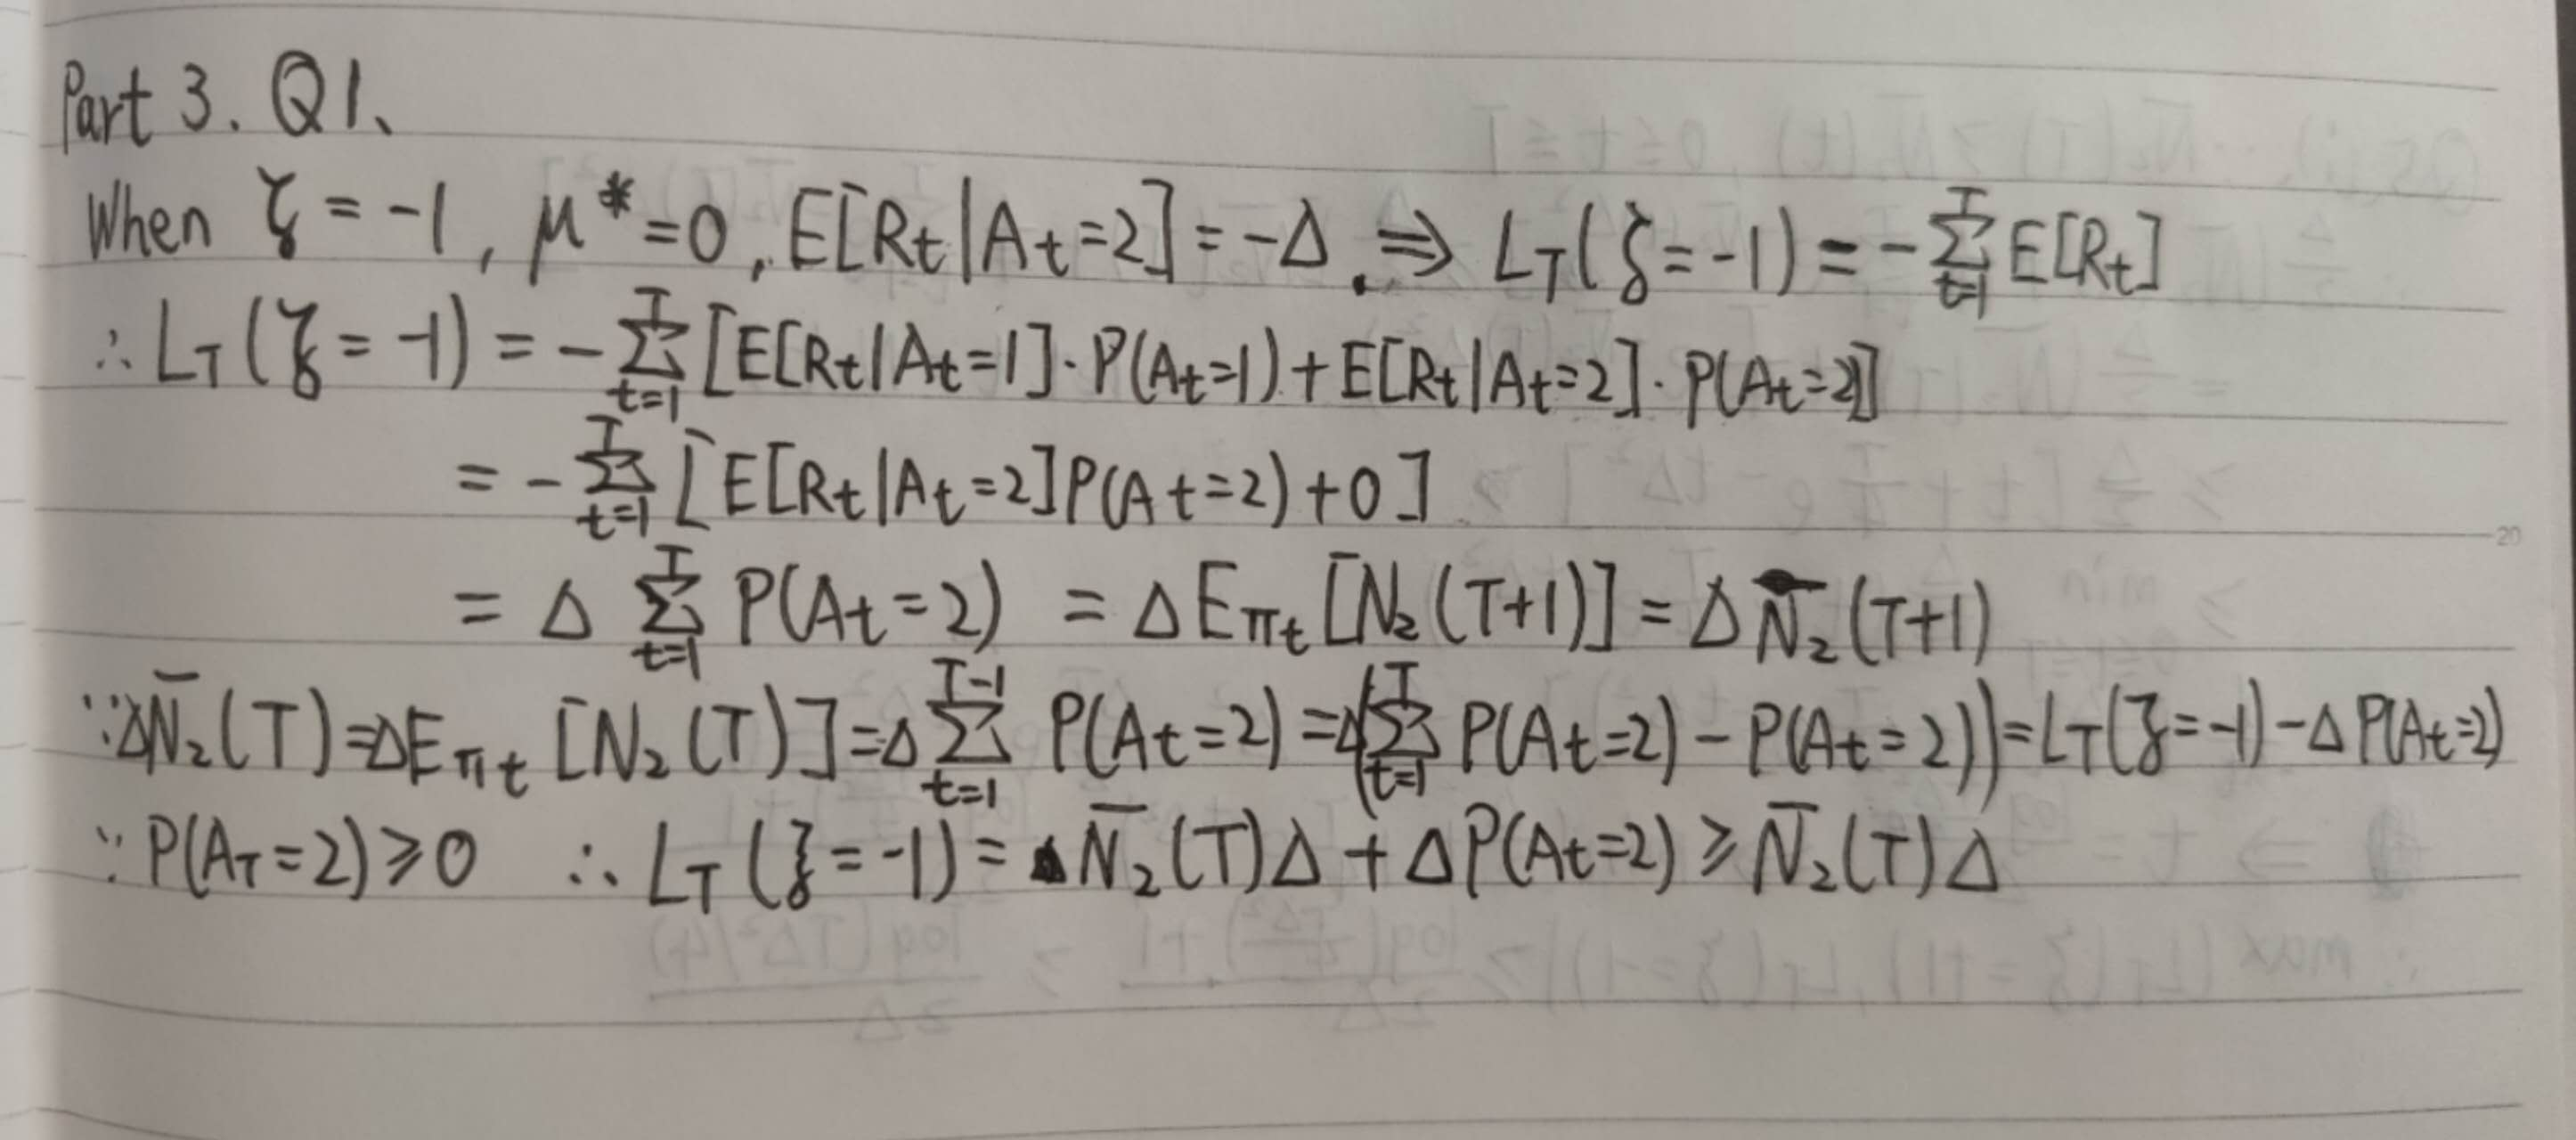

### Too few exploration may not distinguish the sign of effect size

In this part we want to show that
$$ \max \left({L_{T}(\zeta = +1), L_{T}(\zeta = -1)}\right) \geq \frac{1}{2}\left( L_T(\zeta = +1) + L_{T}(\zeta = -1) \right) \geq \frac{\Delta}{16}\left(
\sum_{t=1}^{T} e^{- \bar{N}_{2}(t) \Delta^2}
\right) $$

Let us parse this lower bound. Suppose you opt a policy where you don't explore after a few rounds. Thus the number of pulls of the second arm is going to stay constant, i.e. $\bar{N}_2(t) = O(1)$ (see wiki for [O notation](https://en.wikipedia.org/wiki/Big_O_notation)), and the right hand side in the lower bound above would be proportional to time parameter $T$ as opposed to logarithmic which we are hoping for. In other words this lower bound is saying that exploration is somewhat necessary if we want our regret to be small.  

**Question 2:** Prove that the average regret is porportional to the sum of probability of picking the incorrect arm at each round,
$$\frac{1}{2}\left( L_T(\zeta = +1) + L_{T}(\zeta = -1) \right) = \frac{\Delta}{2}\left(\sum_{t=1}^{T} 
\mathbb{P}[A_{t} = 1 \mid \zeta = +1] + \mathbb{P}[A_{t} = 2 \mid \zeta = -1]
\right)$$

**Answer:** 
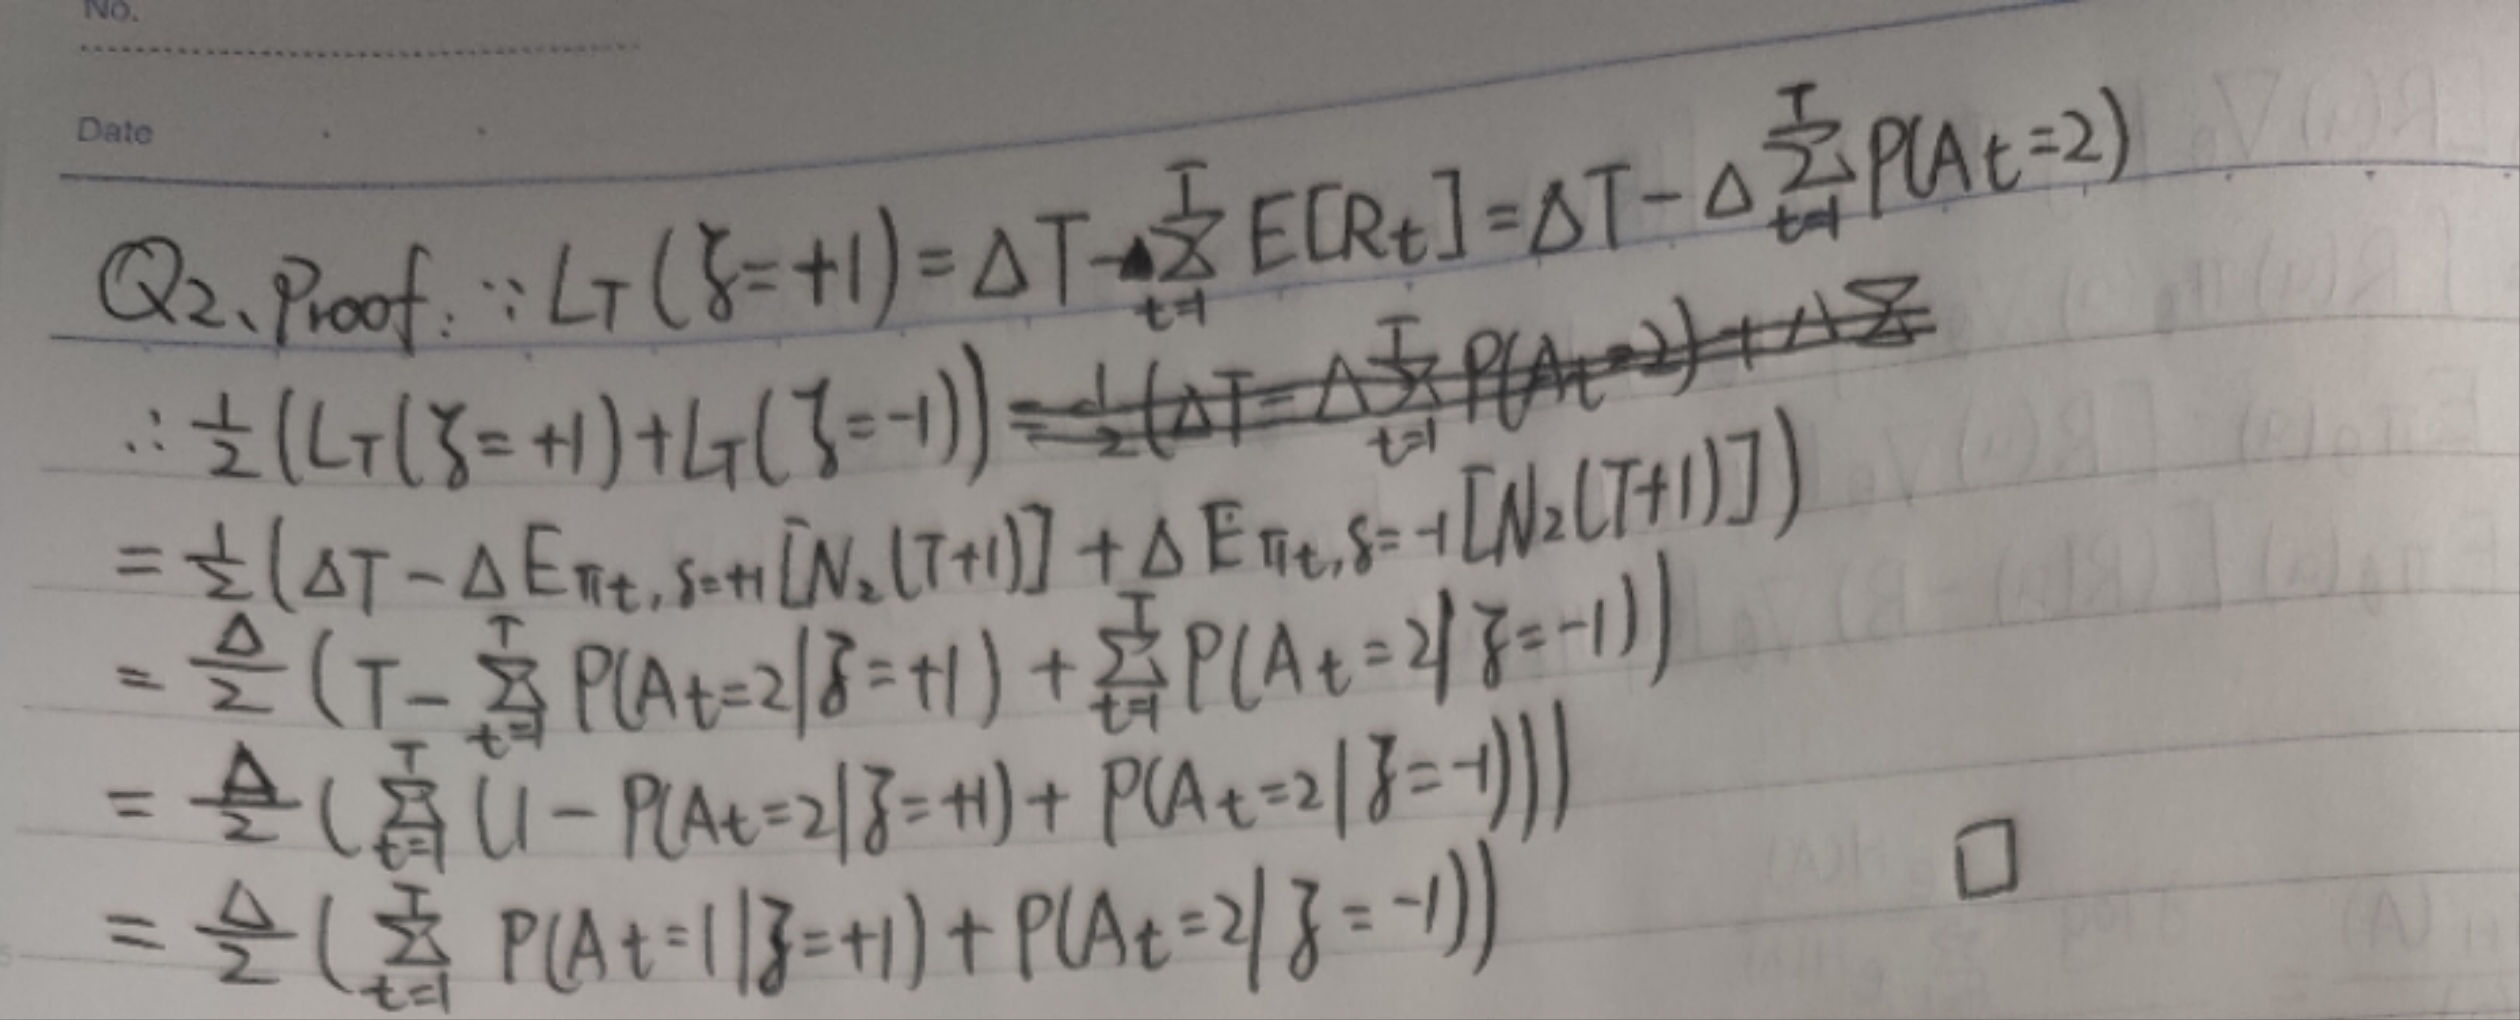

What is the optimal action at time $t$? At this point we have access to rewards from both arms. Though it should be clear that rewards from the first arm is uninformative regarding $\zeta$. Thus the decision of which arm should be picked up next should depend on rewards observed from the second arm. It can be shown that the probability of making a mistake (picking the incorrect arm) is minimized if we choose our action based on [likelihood ratio](https://en.wikipedia.org/wiki/Neyman–Pearson_lemma) which would yield the following action policy:

$$ O_t = 
\begin{cases}
 2 & r_{t} > 0 \\
 1 & r_{t} < 0
\end{cases}
$$
where $r_t = \sum_{i = 1}^{t-1}{R_i 1\{A_i = 2\}}$ is the cumulative reward of the second arm up to time $t$. 

**Question 3:** Given $N_{2}(t)$ what distribution does $r_t$ follows?

**Answer:** 
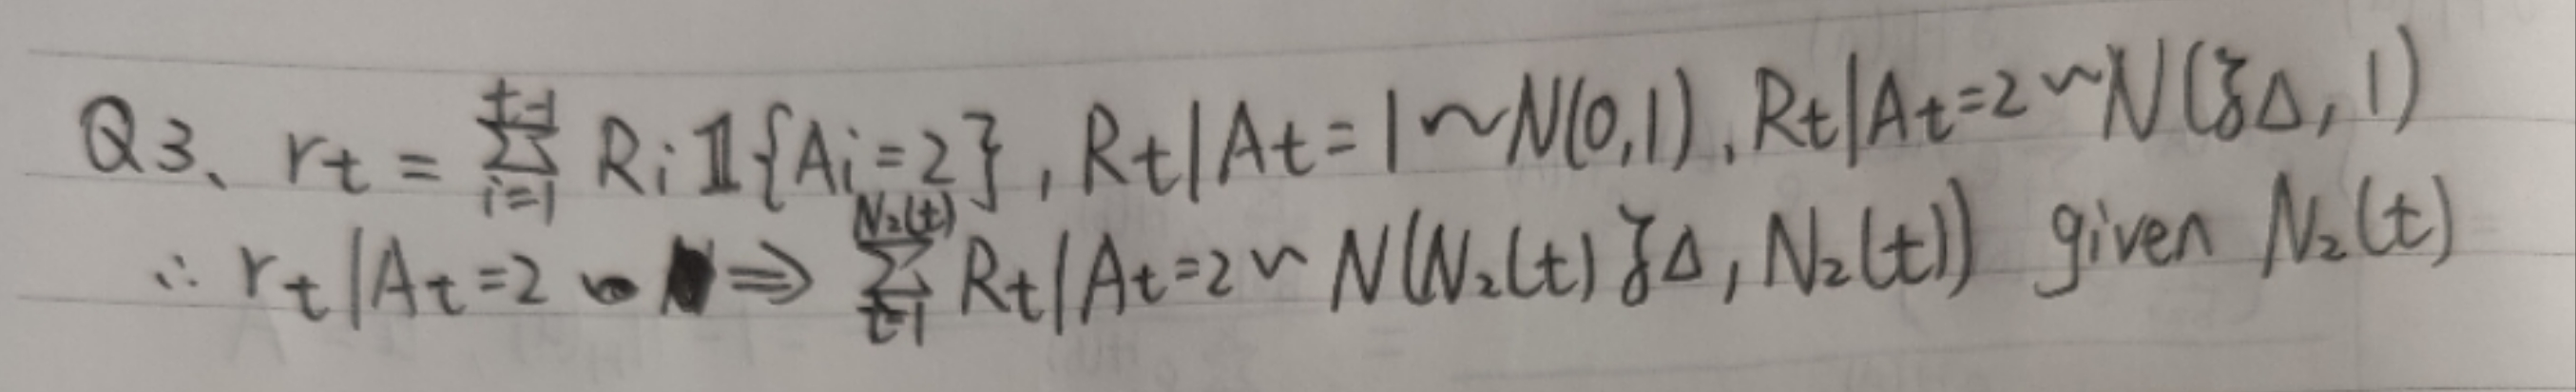

**Question 4:** Using the argument presented above assume that for any action policy we have,
$$ \mathbb{P}[A_{t} = 1 \mid \zeta = +1] + \mathbb{P}[A_{t} = 2 \mid \zeta = -1] \geq \mathbb{P}[O_{t} = 1 \mid \zeta = +1] + \mathbb{P}[O_{t} = 2 \mid \zeta = -1]$$
Given this inequality show that 
$$ \mathbb{P}[O_{t} = 1 \mid \zeta = +1]= \mathbb{P}[O_t = 2 \mid \zeta = -1] \geq \frac{1}{4} e^{- \bar{N}_{2}(t) \Delta^2} $$
by taking the following steps:
- Use the law of total probability to condition on number of times the second arm was pulled $N_{2}(t)$.
- Using Gaussian tail bound $\mathbb{P}[X \geq x] \geq \frac{1}{4}e^{-x^2}$ for $x > 0$ and $X \sim \mathcal{N}(0,1)$ to show a bound on the probability of making a mistake using the optimal action policy ($O_t$) and conclude via [Jensen inequality](https://en.wikipedia.org/wiki/Jensen's_inequality) by taking expectation with respect to randomnes in $N_{2}(t)$.

**Answer:** 
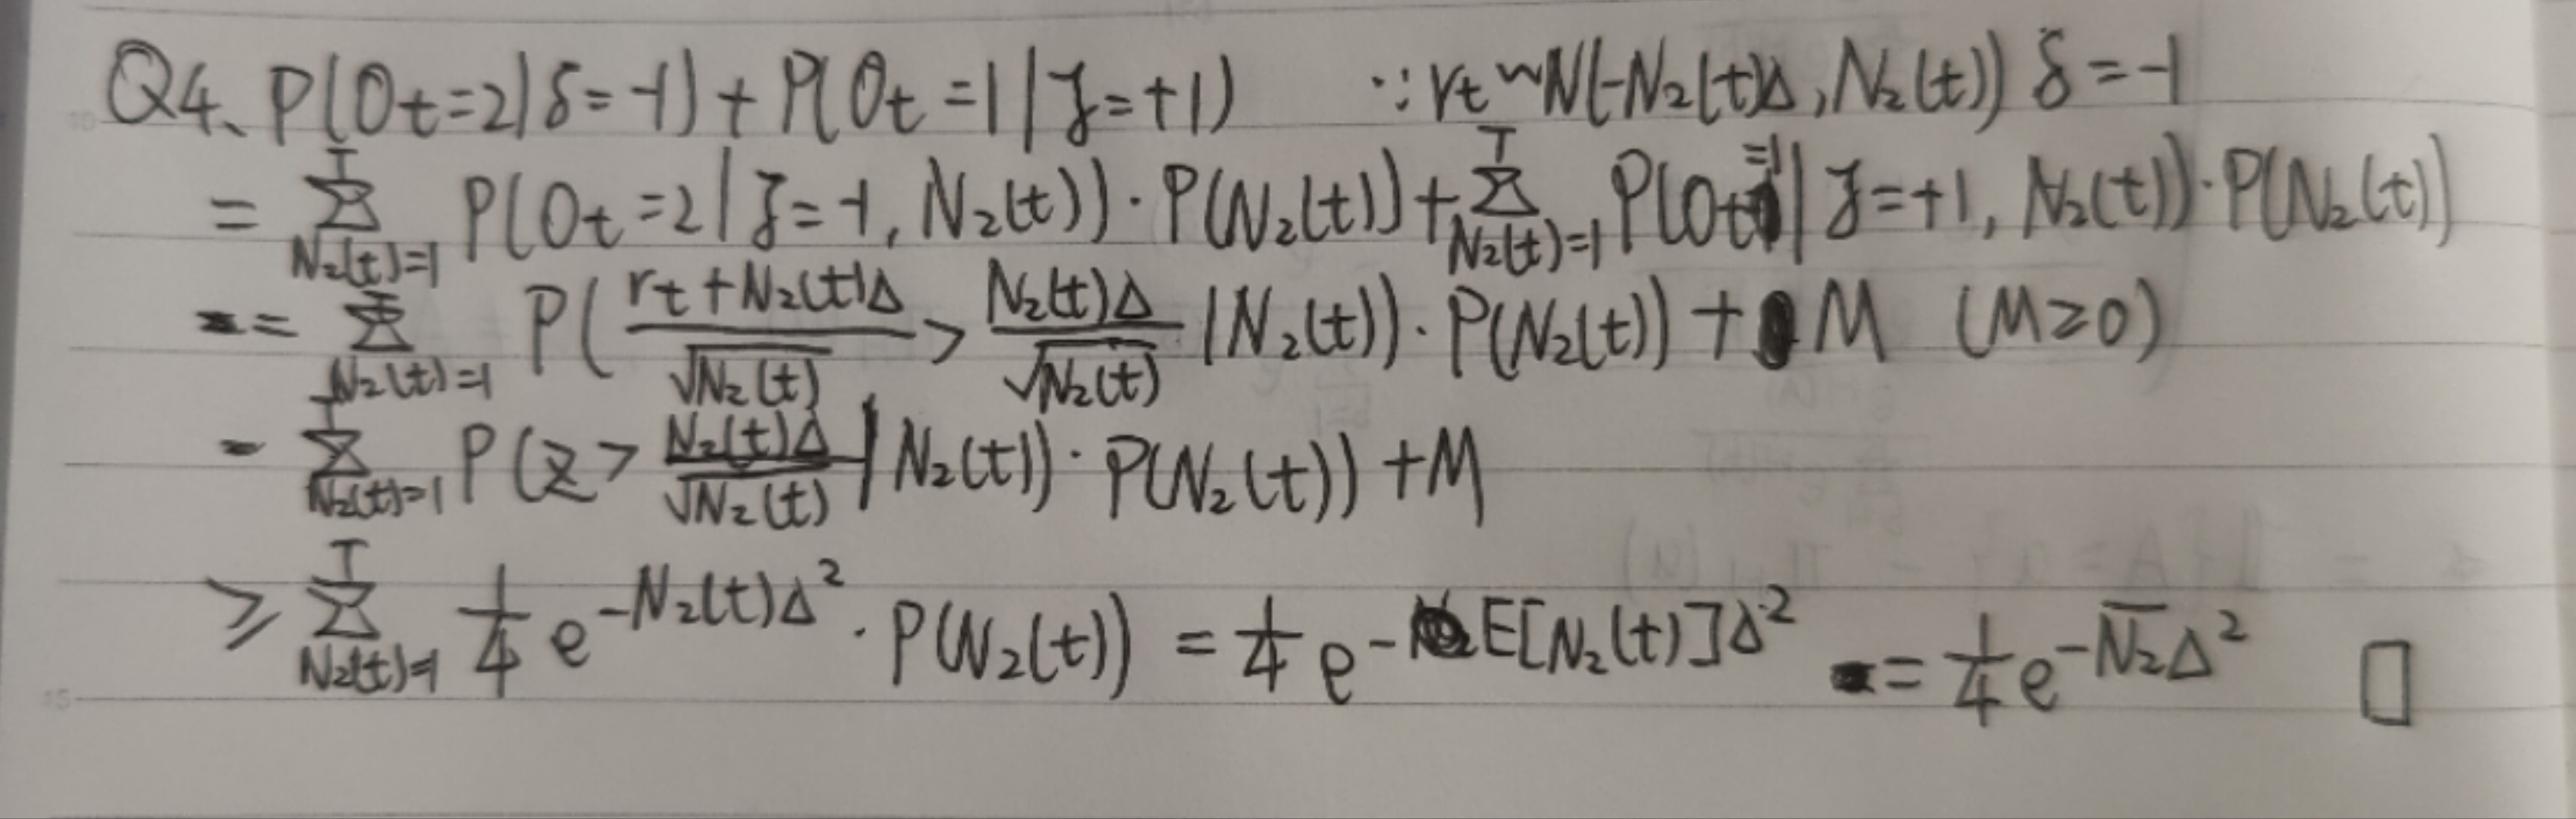

### Combining the tradeoffs

We now proceed to combine the results obtained above. It is easy to see that 
$$\max \left({L_{T}(\zeta = +1), L_{T}(\zeta = -1)}\right) \geq \frac{1}{2} \left( \frac{1}{2}\left( L_T(\zeta = +1) + L_{T}(\zeta = -1) \right) +  L_{T}(\zeta = -1) \right)  $$
Now using the results obtained in Q1 and Q4 we can lower bound the right hand side to obtain,
$$ \max \left({L_{T}(\zeta = +1), L_{T}(\zeta = -1)}\right) \geq \frac{\Delta}{2}( \bar{N}_{2}(T) + \frac{1}{4} \sum_{t=1}^{T} e^{- \bar{N}_{2}(t) \Delta^2} )  $$
This lower bound can be thought of as a **formalization** of the exploration exploitation tradeoff. Notice that having either a very small or large value for $N_{2}(T)$ would result in a large lower bound. Thus we need to find the perfect balance, which we do so in the follwing question.

**Question 5:** Take the following steps:
- (i) Show that
$$ \max \left({L_{T}(\zeta = +1), L_{T}(\zeta = -1)}\right) \geq \min_{0 \leq t \leq T}\frac{\Delta}{2}( t + \frac{T}{4} e^{- t \Delta^2} ) $$
- (ii) By minimizing the term in the right hand side show that 
$$ \max \left({L_{T}(\zeta = +1), L_{T}(\zeta = -1)}\right) \geq \frac{\log(T \Delta^2/4)}{2\Delta} $$

**Answer** 
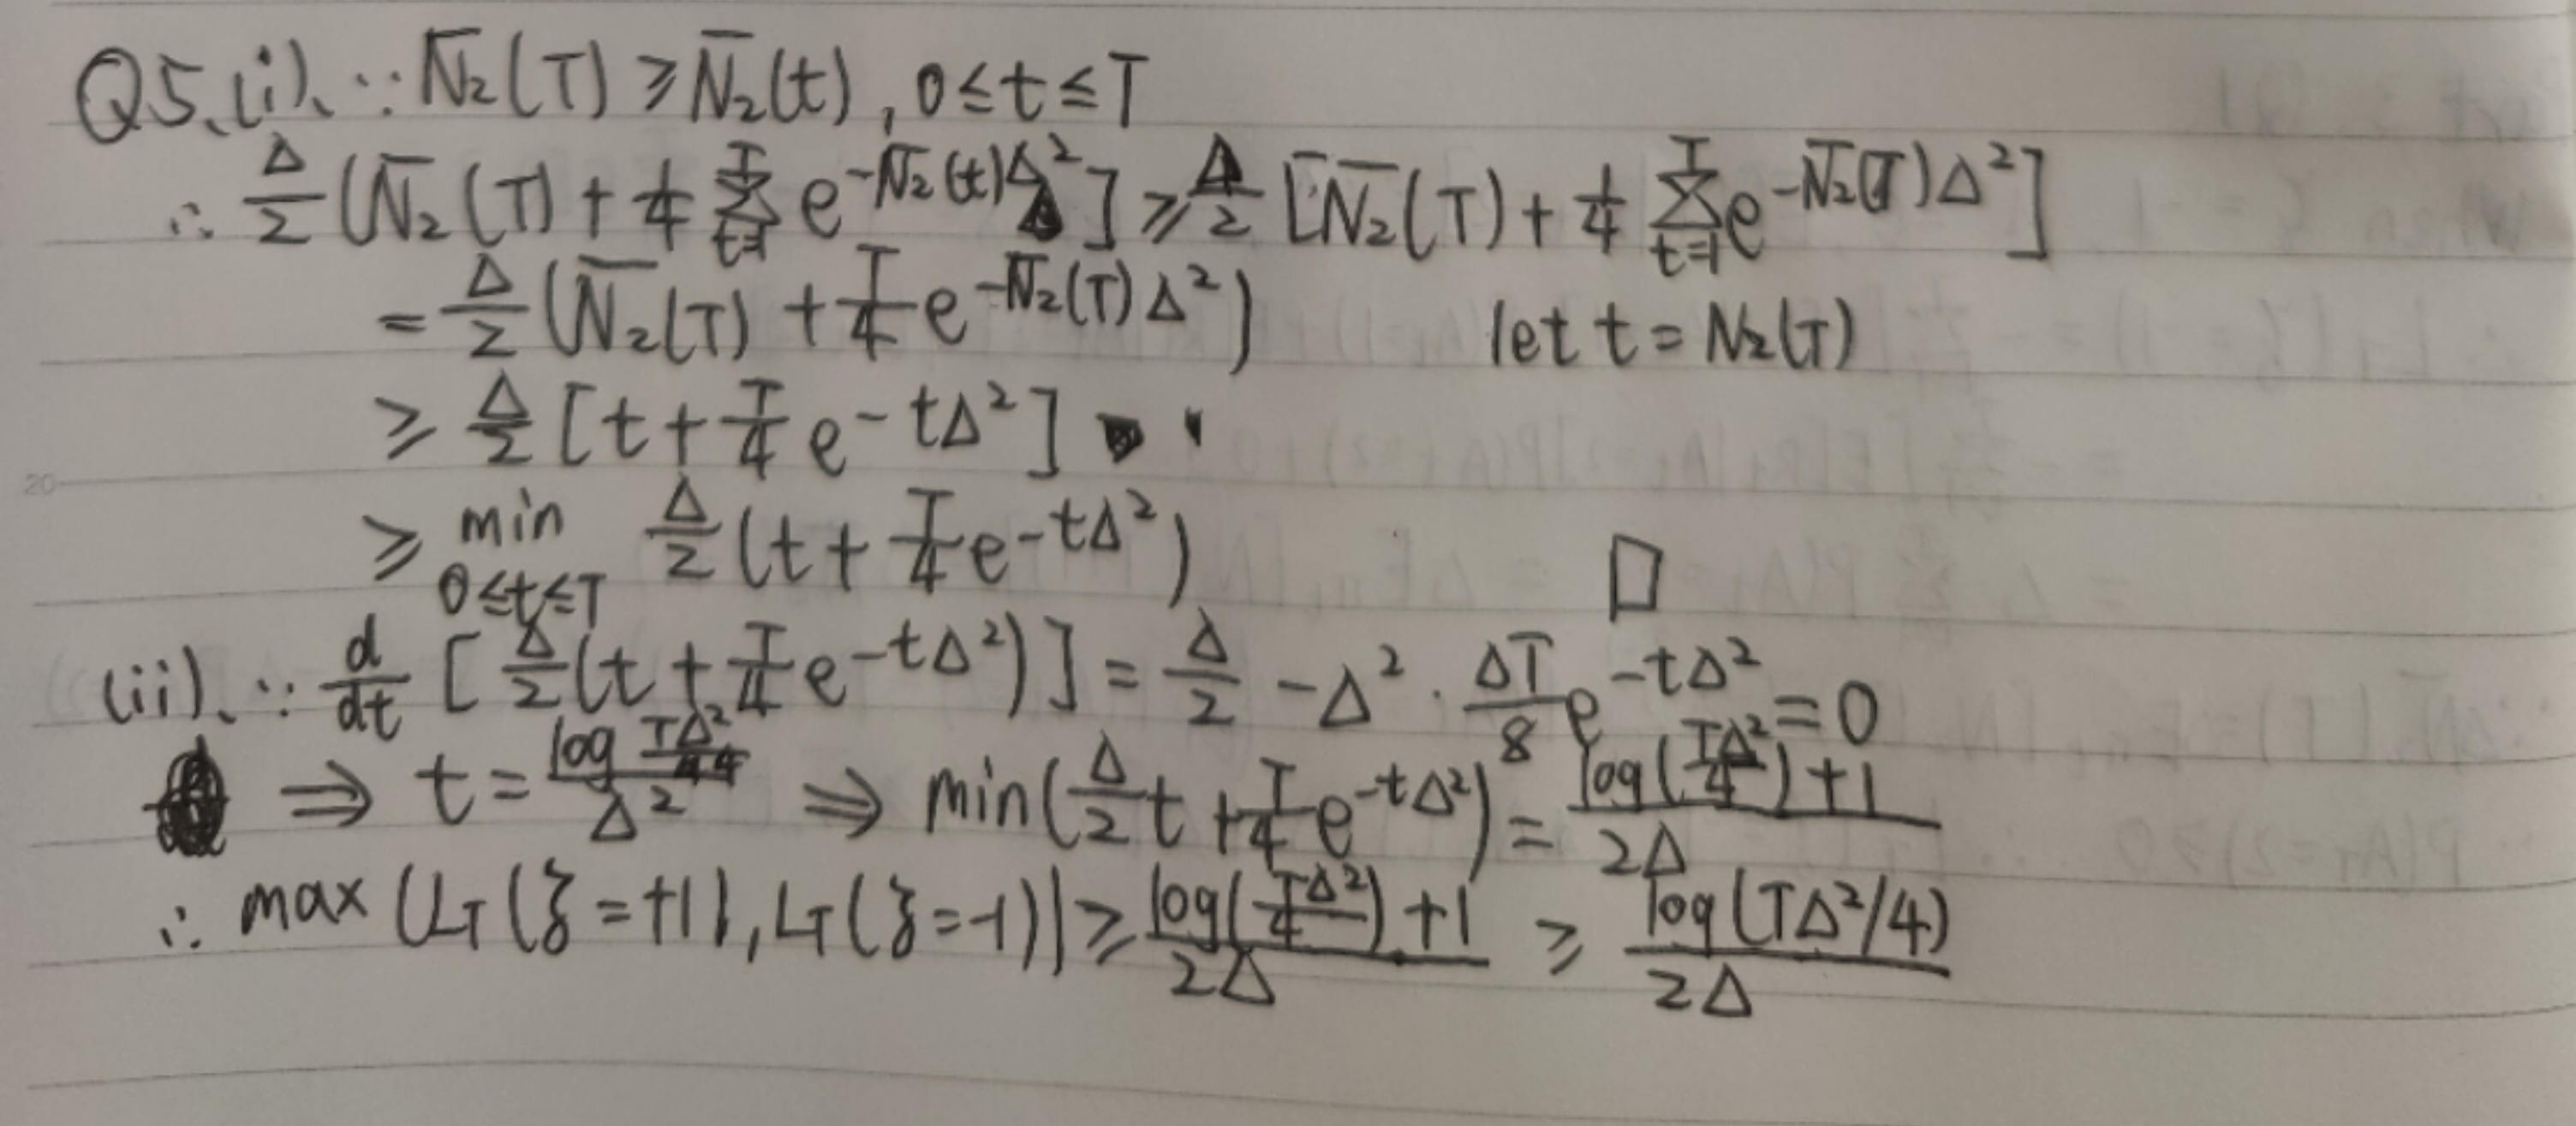